# Intro to DNN Using TensorFlow (Shallow Neural Networks)

`pip install keras`

In [1]:
import tensorflow as tf #will be used for activation functions
from tensorflow.keras import models, layers #allow us to build our model and its components as layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


- The MNIST data comes in 2D format (we previously used already flattened format)
- We need to flatten the dataset to use a traditional DNN

![fl](https://testerstories.com/files/ai_and_ml/ml-mnist-2d-to-1d.png)

## Step 1: Loading and Splitting The Data 

In [2]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.min(), X_train.max()

(0, 255)

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
X_test.shape[0]/(X_test.shape[0]+X_train.shape[0])

0.14285714285714285

In [7]:
X_train.nbytes/1000000

47.04

- For ML, standardization is recommended in general. When it comes to Deep Learning, using MinMaxScaler (range 0 to 1) is specifically recommended.
- Potential advantages (hihg probability):
    - Improving Model Performance: since we have a range between 0 and 1, it reduces the impact of dominant features (better accuracy).
    - Faster Convergence and Error Reduction: during training the optimizer (e.g. Adam or Gradient Descent) runs smoother and can find the optimal weights faster.
    - Reduced Overfitting: it allows the model to generalize better.
    - Handling Outliers
- Instead of using `MinMaxScaler()` from SKLearn or `layers.Rescaling` from Keras, we can divide by 255 (only for image data)
- Previous trials of this problem proved that the performance went from 94.5% to 98.9% and the execution time took 30% less 

In [8]:
X_train, X_test = X_train/255.0, X_test/255.0 #using decimal value preserves the float format

## Step 2: Building The Neural Network Model

- In this stage, we make a decision about the architecture of our Neural Network and the components that will be used.
- For this exercise, we'll be using `Sequential` to assemble the following:
    - First Layer: Input Layer 
    - Second Layer: Flattening functionality
    - Third Layer: Hidden Layer with RelU Activation Function and 128 neurons
    - Fourth Layer: Output 

In [9]:
nn_model = models.Sequential(
                        [
                       layers.Input(shape=(28,28)),
                       layers.Flatten(),
                       layers.Dense(128, activation='relu'), # the choice of num of neurons is a hyperparameter and can be perfected via trial and error
                       layers.Dense(10) # choosing 10 neurons that match the number of predicted classes
                        ] 
                    )

In [10]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
784 * 128 + 128

100480

- The summary is useful to get info about the architecture and num of layers and neurons.
- The first number  is the input (num of pixels)
- Second row shows 100,480 parameters = (784 Inp neurons x 128 HL neurons) weight count + 128 biases. Or 100,352 weights + 128 biases
- Third row 1,290 = 128 * 10 + 10

## Step 3: Defining The Loss Function And The Optimizer

- The loss function measures the difference between predicted outputs and actual outputs
- We have different types:
    - Regression:
        - Mean Squared Error (MSE)
        - Mean Absolute Error (MAE)
    - Classification:
        - Binary Cross-Entropy Loss
        - Categorical Cross-Entropy
- Since we have 10 categories, we need to use `SparseCategoricalCrossentropy`
- It's always recommended to start with the Adam optimizer because it has been proven it's the best of the best.
> Note 1: Although it was proven that Adam gives the best results, that doesn't mean we should ignore others. We can consider them if the model doesn't perform well. (aka Hyperparameter tuning)

> Note 2: Since we don't have an activation function in the output layer, we need to enable `from_logits` functionality.

In [12]:
from tensorflow.keras import losses

loss_fn = losses.SparseCategoricalCrossentropy(from_logits=True)

In [13]:
opt_algo = 'adam'

## Step 4: Compile The Model

Compiling the model simply attaches the loss func, optimizer, and loss measurement into the main model.

In [14]:
nn_model.compile(optimizer=opt_algo,
                 loss=loss_fn,
                 metrics=['accuracy']
                 )

In [15]:
epoch_num = 6
#we define the fit as an object to preserve the training log history
model_history = nn_model.fit(X_train,
                             y_train,
                             validation_split=0.2,
                             epochs=epoch_num
                                )

Epoch 1/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - accuracy: 0.8676 - loss: 0.4781 - val_accuracy: 0.9546 - val_loss: 0.1614
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9555 - loss: 0.1456 - val_accuracy: 0.9657 - val_loss: 0.1171
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - accuracy: 0.9726 - loss: 0.0942 - val_accuracy: 0.9698 - val_loss: 0.1032
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 0.9789 - loss: 0.0704 - val_accuracy: 0.9718 - val_loss: 0.0928
Epoch 5/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.9843 - loss: 0.0529 - val_accuracy: 0.9726 - val_loss: 0.0970
Epoch 6/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 0.9889 - loss: 0.0383 - val_accuracy: 0.9726 - val_loss: 0.0938


- The model fits the data using 6 epochs
- We can see that accuracy is improving over num of epochs and loss is decreasing for both Training and Validation.
- Therefore, we don't have overfitting.

## Step 5: Final Evaluation

In [79]:
nn_model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - 463us/step - accuracy: 0.9758 - loss: 0.0773


[0.07730652391910553, 0.9757999777793884]

Another way to evaluate a mode, is to plot the history

In [80]:
model_history.history #our log was captured in a dictionary

{'accuracy': [0.9192291498184204,
  0.9622499942779541,
  0.9738333225250244,
  0.9807500243186951,
  0.9855416417121887,
  0.9881041646003723],
 'loss': [0.2834118902683258,
  0.126373291015625,
  0.08596336841583252,
  0.06391439586877823,
  0.04883674532175064,
  0.03853509947657585],
 'val_accuracy': [0.9505000114440918,
  0.9626666903495789,
  0.9707499742507935,
  0.9737499952316284,
  0.9710833430290222,
  0.9705833196640015],
 'val_loss': [0.16422225534915924,
  0.1248878687620163,
  0.1000077947974205,
  0.08908554911613464,
  0.1005043163895607,
  0.09973784536123276]}

In [81]:
plt.style.use('bmh')

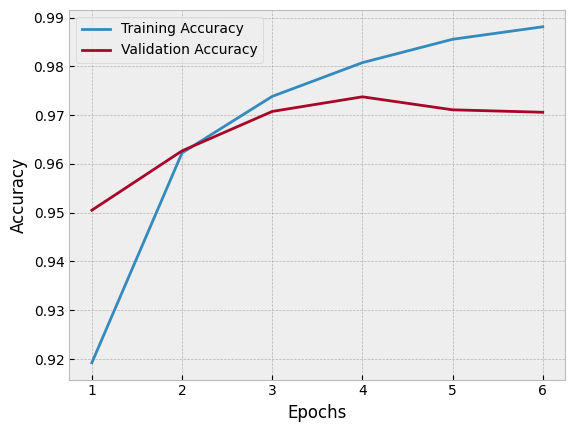

In [82]:
epoch_axis_val = range(1,epoch_num+1)
plt.plot(epoch_axis_val,model_history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epoch_axis_val,model_history.history['val_accuracy'], label = 'Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

- We can see that a gap starts to form between training and validation, which is an indicator of overfitting emerging
- The difference is not substantial yet. Therefore, epoch of 5 or 6 is  a good number to use.

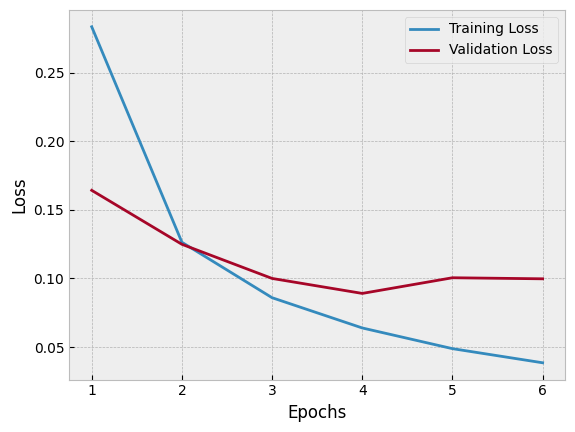

In [83]:
plt.plot(epoch_axis_val,model_history.history['loss'], label = 'Training Loss')
plt.plot(epoch_axis_val,model_history.history['val_loss'], label = 'Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Optional Step: Visual Evaluation

Make the prediction of the test data

In [84]:
predictions = nn_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


In [85]:
predictions

array([[ -5.0498924 ,  -9.1960125 ,  -0.54262066, ...,  13.386592  ,
         -1.8044049 ,  -1.3428156 ],
       [ -5.768286  ,   0.92842376,  14.719488  , ..., -15.439484  ,
          2.187954  , -15.913082  ],
       [ -4.585389  ,   5.8820996 ,  -3.3972802 , ...,   0.24999157,
         -0.4789639 ,  -5.337262  ],
       ...,
       [-10.648377  , -12.639145  , -14.56264   , ...,  -0.62912697,
          0.87359315,   2.417047  ],
       [ -8.515124  ,  -9.811664  , -13.451207  , ...,  -7.8876033 ,
          1.0741022 ,  -9.202958  ],
       [ -3.8507917 ,  -8.118899  ,  -4.562765  , ..., -10.902128  ,
         -5.0371995 , -10.137582  ]], dtype=float32)

Since we don't have an activation function in the output layer, the output is raw. Therefore, we need to convert it to readable output (10 classes) using `argmax()` function.

**Optional** observing the first prediction.

In [86]:
first_prediction_prob = tf.math.softmax(predictions[0])
first_prediction_prob

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9.8403525e-09, 1.5573076e-10, 8.9226592e-07, 2.8757329e-04,
       1.5778646e-12, 4.3555088e-09, 2.5799414e-14, 9.9971098e-01,
       2.5264356e-07, 4.0084285e-07], dtype=float32)>

In [87]:
# if you sum up the prob values above
tf.reduce_sum(first_prediction_prob)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0000001>

- You can see the probabilities above for each class.
- They all add to 1

In [88]:
first_prediction_final = tf.math.argmax(first_prediction_prob)
first_prediction_final

<tf.Tensor: shape=(), dtype=int64, numpy=7>

The first prediction is 7

Get the results for all in one shot.

In [89]:
predicted_classes = tf.math.argmax(predictions, axis=1)

In [90]:
predicted_classes[:20]

<tf.Tensor: shape=(20,), dtype=int64, numpy=array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])>

In [91]:
num_samples = 15
sample_X = X_test[:num_samples]
sample_images = sample_X.reshape(num_samples, 28, 28) 
sample_labels_pred = predicted_classes[:num_samples]


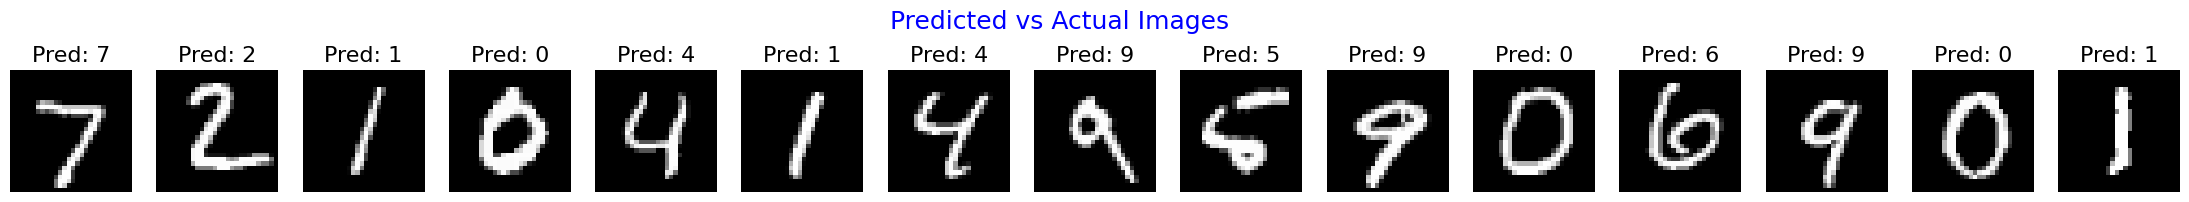

In [92]:
plt.figure(figsize=(28, 3))
plt.suptitle("Predicted vs Actual Images", fontsize=18, color='Blue', y=0.9)


for img in range(num_samples):
    plt.subplot(1, num_samples, img +1)
    plt.imshow(sample_images[img], cmap='gray')
    plt.title(f'Pred: {sample_labels_pred[img]}', fontsize=16)
    plt.axis('off')

Take a look at the labels that did not match (pred vs actual)

In [93]:
predicted_classes != y_test

<tf.Tensor: shape=(10000,), dtype=bool, numpy=array([False, False, False, ..., False, False, False])>

In [94]:
# use the nonzero in numpy to get the values that satisfy the condition above

misclassified_indices = np.nonzero(predicted_classes != y_test)
misclassified_indices # indices of the labels that did not match

(array([ 119,  151,  241,  247,  274,  321,  340,  381,  404,  445,  578,
         582,  583,  613,  619,  628,  659,  684,  707,  720,  740,  846,
         883,  900,  951,  965, 1014, 1039, 1107, 1112, 1114, 1128, 1182,
        1226, 1242, 1247, 1270, 1290, 1299, 1319, 1328, 1356, 1393, 1395,
        1494, 1500, 1522, 1530, 1549, 1551, 1554, 1609, 1621, 1670, 1681,
        1709, 1717, 1721, 1751, 1790, 1828, 1901, 1909, 1952, 1987, 2004,
        2043, 2053, 2073, 2109, 2118, 2130, 2135, 2174, 2182, 2224, 2272,
        2292, 2293, 2299, 2333, 2369, 2387, 2406, 2422, 2433, 2447, 2454,
        2488, 2570, 2607, 2618, 2635, 2648, 2654, 2713, 2771, 2877, 2896,
        2915, 2939, 2953, 3030, 3060, 3073, 3117, 3339, 3405, 3429, 3474,
        3490, 3503, 3520, 3534, 3549, 3558, 3597, 3718, 3796, 3808, 3811,
        3853, 3869, 3876, 3893, 3906, 3926, 3941, 3943, 3946, 4000, 4063,
        4065, 4154, 4163, 4176, 4199, 4201, 4211, 4224, 4248, 4271, 4289,
        4294, 4355, 4439, 4497, 4534, 

In [95]:
len(misclassified_indices[0])

242

665 errors out of 10K

In [96]:
misclassified_indices[0][:15]

array([119, 151, 241, 247, 274, 321, 340, 381, 404, 445, 578, 582, 583,
       613, 619])

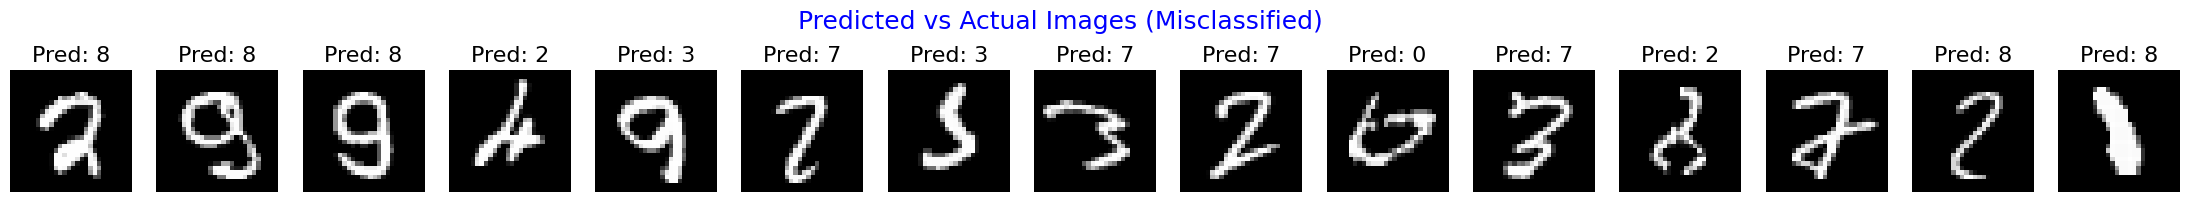

In [97]:
sample_X = X_test[misclassified_indices[0][:15]]
sample_images = sample_X.reshape(num_samples, 28, 28) 
sample_labels_pred = predicted_classes.numpy()[misclassified_indices[0][:15]] #converted to numpy for easier index reference

plt.figure(figsize=(28, 3))
plt.suptitle("Predicted vs Actual Images (Misclassified)", fontsize=18, color='Blue', y=0.9)

for img in range(num_samples):
    plt.subplot(1, num_samples, img +1)
    plt.imshow(sample_images[img], cmap='gray')
    plt.title(f'Pred: {sample_labels_pred[img]}', fontsize=16)
    plt.axis('off')


## Saving and Loading The Model

In [98]:
nn_model.save("nn_model_20241123.keras")

In [99]:
from tensorflow.keras import saving
loaded_model = saving.load_model("nn_model_20241123.keras")